In [17]:
# EDA.ipynb
# 1. Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff

# Notebook settings
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [18]:
# 2. Load ARFF dataset
data, _ = arff.loadarff('../data/KDDTrain+.arff')
df = pd.DataFrame(data)

# Decode bytes to strings
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Preview
df.head()


C:\Users\rgriy\AppData\Local\Temp\ipykernel_4792\3818733216.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [19]:
# 3. Dataset overview
print("Shape:", df.shape)
df.info()


Shape: (125973, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 no

In [20]:
# 4. Statistical summary of numeric features
df.describe()


,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# 5. Null values check
df.isnull().sum().sort_values(ascending=False)


duration                       0
dst_host_count                 0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_srv_count             0
protocol_type                  0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
count                          0
is_guest_login                 0
is_host_login                  0
num_outbound_cmds              0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent    

class
normal     67343
anomaly    58630
Name: count, dtype: int64


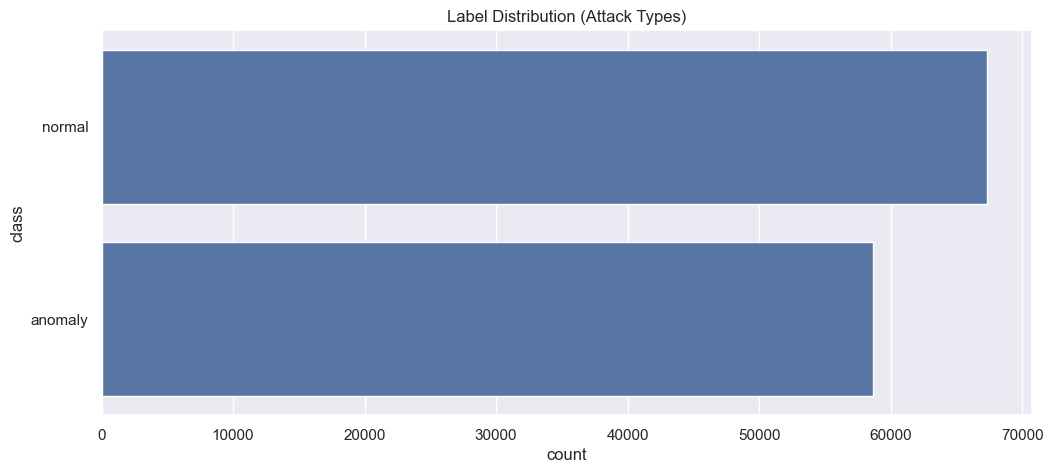

In [22]:
# 6. Label distribution (multi-class)
label_counts = df['class'].value_counts()
print(label_counts)

# Plot
plt.figure(figsize=(12, 5))
sns.countplot(y='class', data=df, order=label_counts.index)
plt.title("Label Distribution (Attack Types)")
plt.show()


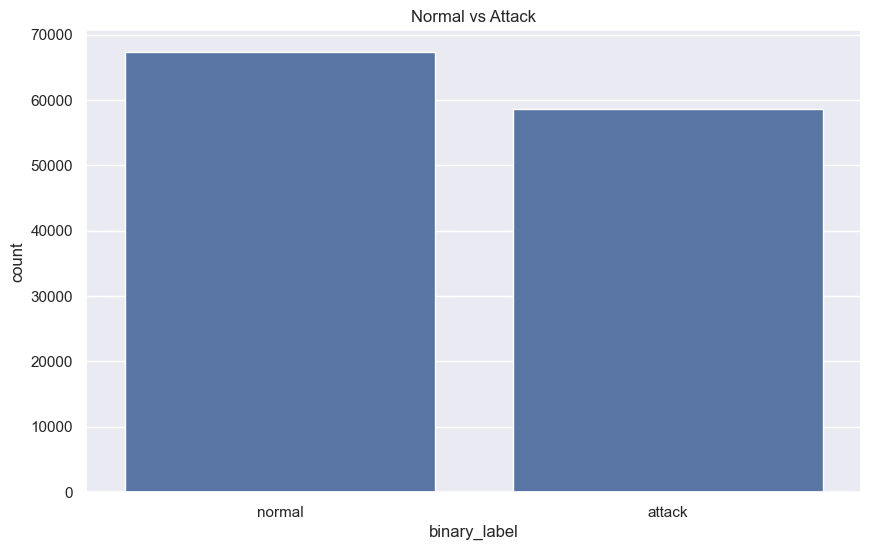

binary_label
normal    0.534583
attack    0.465417
Name: proportion, dtype: float64

In [24]:
# 7. Binary label (normal vs attack)
df['binary_label'] = df['class'].apply(lambda x: 'normal' if x == 'normal' else 'attack')

# Count & plot
sns.countplot(x='binary_label', data=df)
plt.title("Normal vs Attack")
plt.show()

df['binary_label'].value_counts(normalize=True)


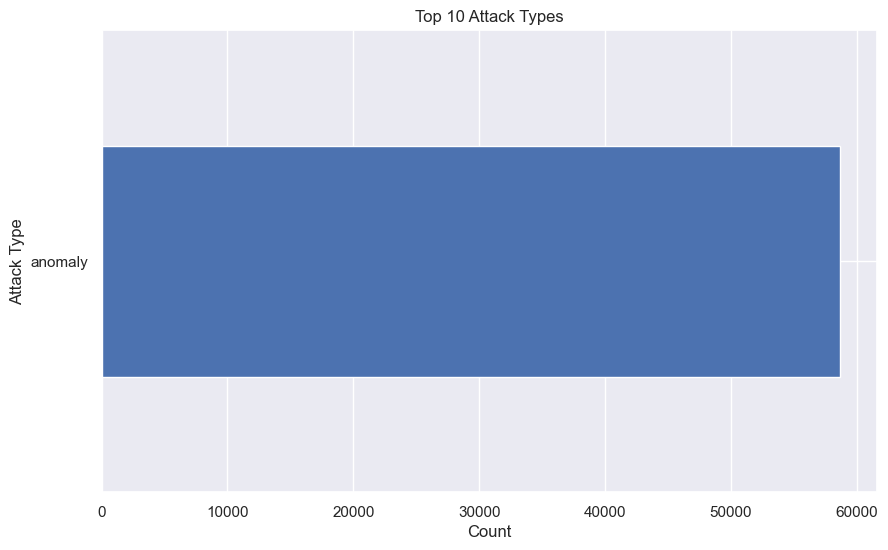

In [26]:
# 8. Top 10 Attack Types
top_attacks = df[df['class'] != 'normal']['class'].value_counts().head(10)

top_attacks.plot(kind='barh', title='Top 10 Attack Types')
plt.xlabel("Count")
plt.ylabel("Attack Type")
plt.show()


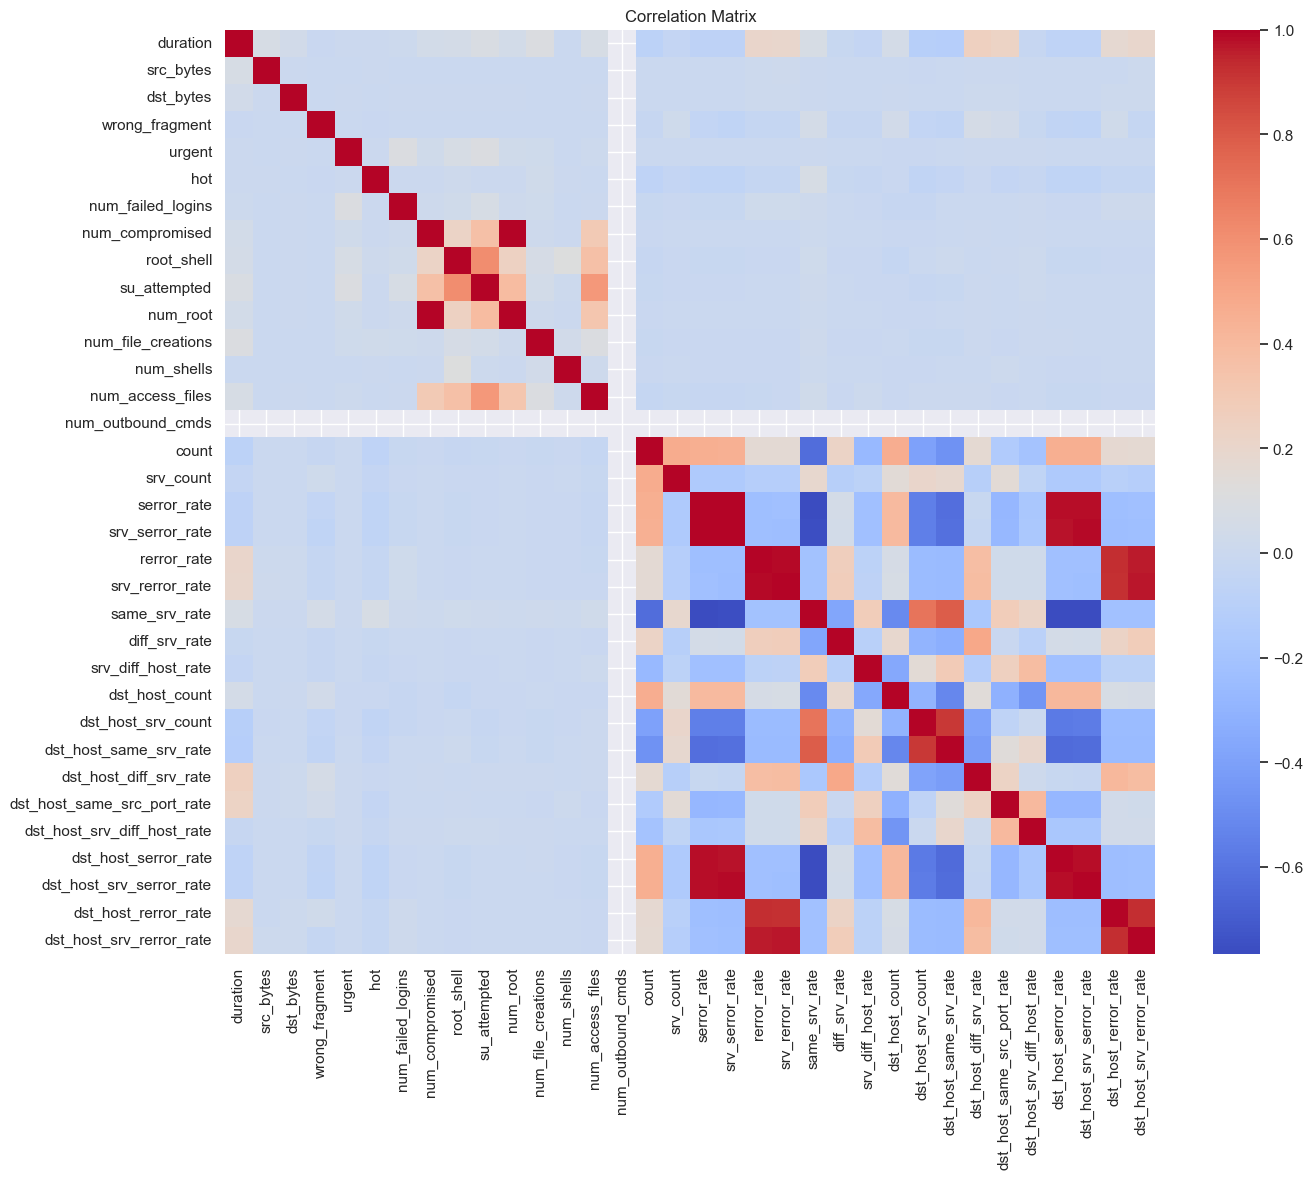

In [27]:
# 9. Correlation heatmap for numeric features
df_numeric = df.select_dtypes(include=['int64', 'float64'])

corr = df_numeric.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


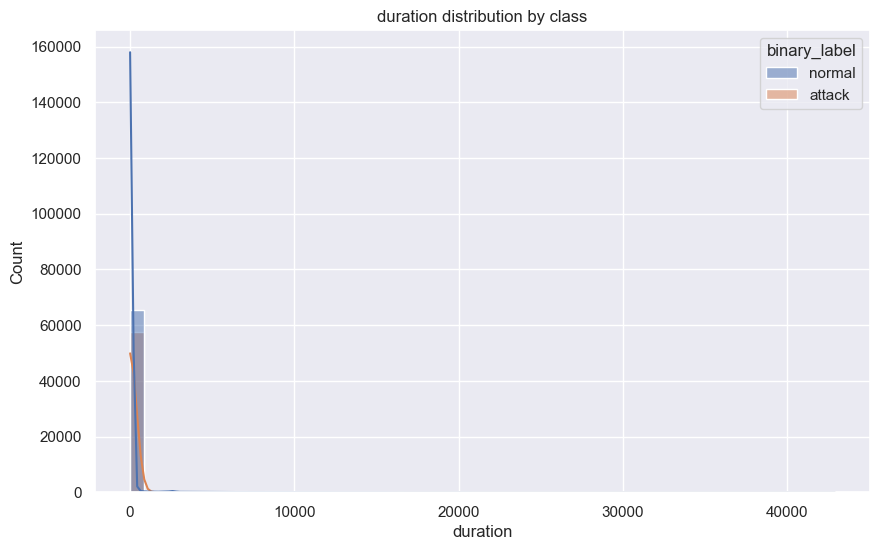

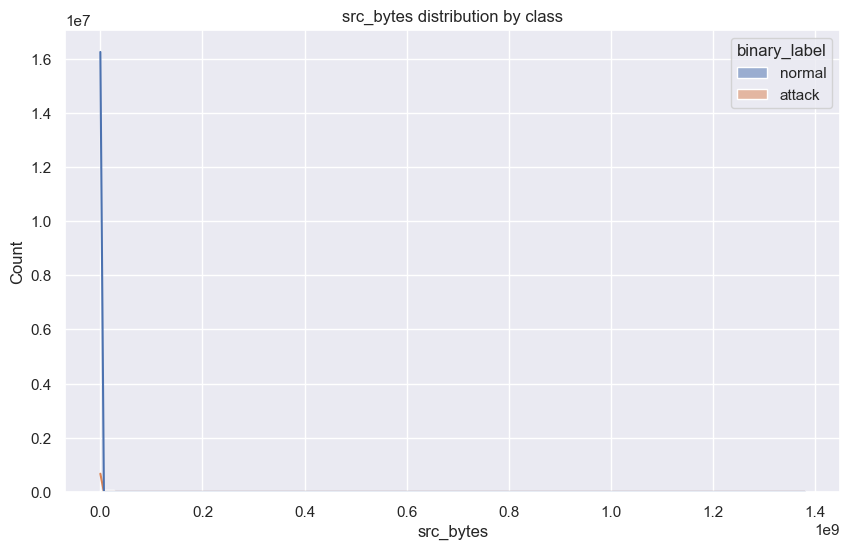

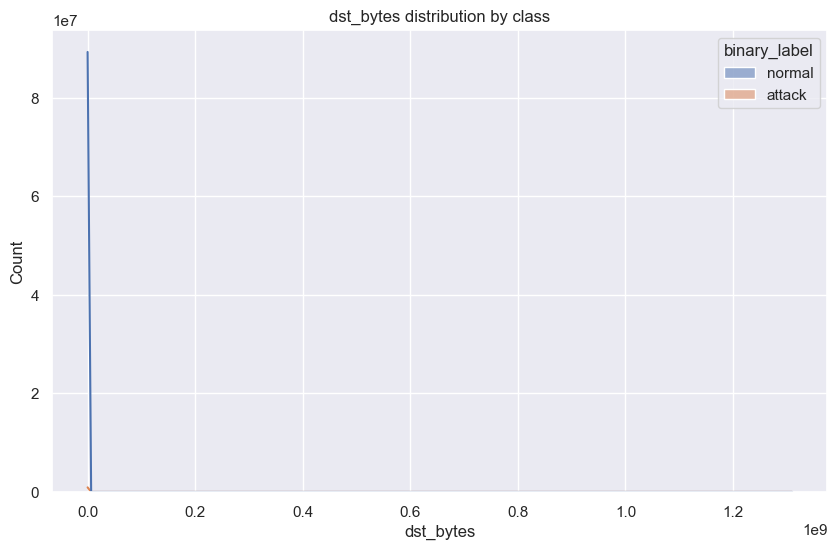

In [28]:
# 10. Distribution of key numeric features
features_to_plot = ['duration', 'src_bytes', 'dst_bytes']

for col in features_to_plot:
    plt.figure()
    sns.histplot(data=df, x=col, hue='binary_label', bins=50, kde=True)
    plt.title(f"{col} distribution by class")
    plt.show()


In [29]:
# 11. Save cleaned dataset (optional)
df.to_csv('../data/nsl_kdd_clean.csv', index=False)
print("Cleaned dataset saved to data/nsl_kdd_clean.csv")


Cleaned dataset saved to data/nsl_kdd_clean.csv
